In [1]:
!git clone https://github.com/geneexpressionpolito/Transformers-for-gene-expression-prediction-from-raw-dna-sequences.git
!mv ./Transformers-for-gene-expression-prediction-from-raw-dna-sequences/Classes ./
!pip install import-ipynb
!gdown --folder 1u34ntvh4dL5Y5_hZSA9EDs5SZ32MPda1
import import_ipynb
import os

Mounted at /content/drive


In [4]:
from Classes.DataManager import DataManager
from Classes.CNN1D import projCNN1D
from tensorflow import keras
import numpy as np

%load_ext tensorboard

importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/DataManager.ipynb
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/CNN1D.ipynb
Populating the interactive namespace from numpy and matplotlib


data loading takes at most 17s

In [5]:
dm = DataManager(transformer=False, micro=False)
X_trainhalflife, X_trainpromoter, y_train, _, _                 = dm.get_train(True, False, False)
X_validationhalflife, X_validationpromoter, y_validation, _, _  = dm.get_validation(True, False, False)
X_testhalflife, X_testpromoter, y_test, _, _                    = dm.get_test(True, False, False)

Preprocessing-> Padding

In [6]:
leftpos  = 9_500          #3_000 
rightpos = 20_000         #13_500

maxlen   = rightpos-leftpos
print("maxlen: ",maxlen)

maxlen:  10500


In [7]:
X_trainpromoter_p         = X_trainpromoter[:, leftpos:rightpos, :]
X_validationpromoter_p = X_validationpromoter[:, leftpos:rightpos, :]
X_testpromoter_p          = X_testpromoter[:, leftpos:rightpos, :]

model built
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10500, 4)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 10500, 128)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 350, 128)     0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 350, 32)      36896       max_pooling1d[0][0]              
__________________________________________________________________________________

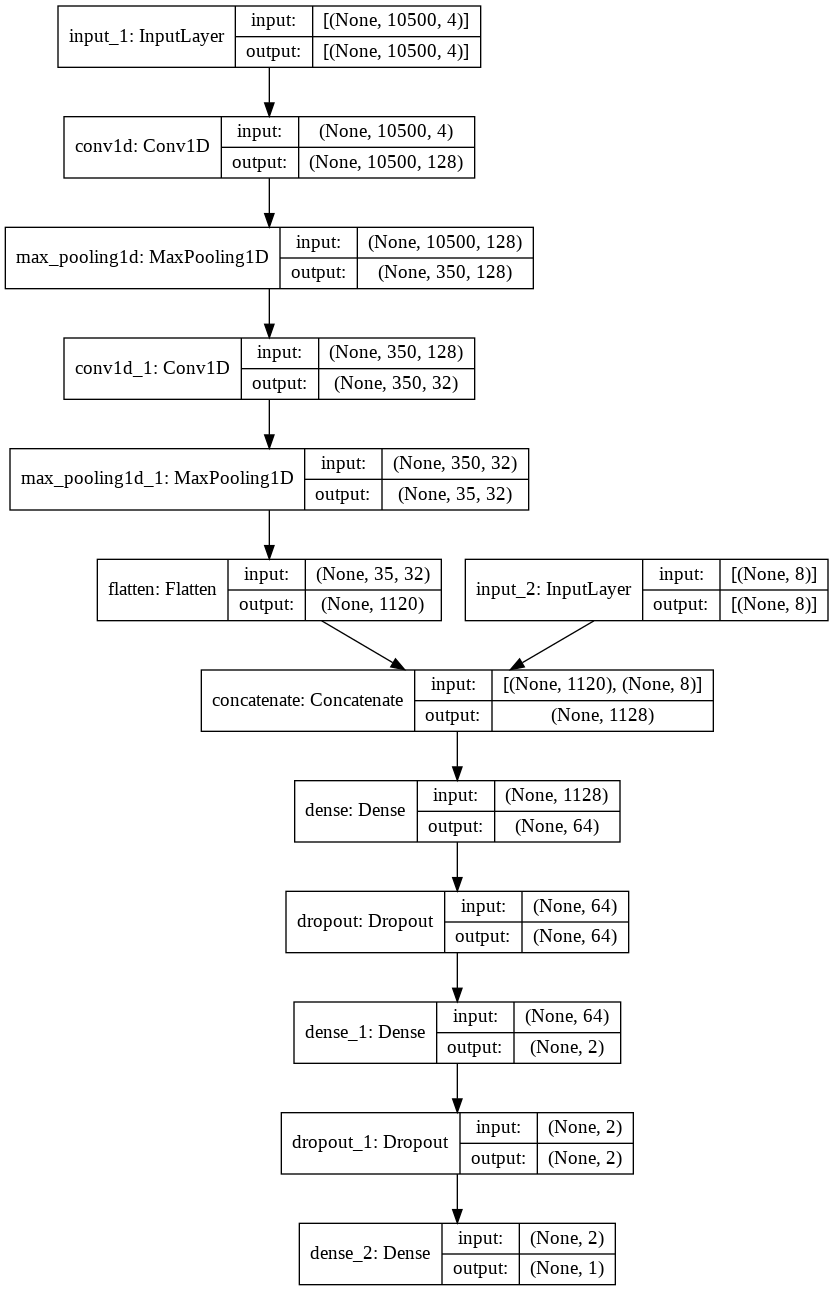


Parameters:
{'checkpoint_dir': 'Xpresso_ort', 'model_type': 'Xpresso_ort', 'n_epochs': 100, 'batch_size': 128, 'learning_rate': 0.0005, 'momentum': 0.9, 'CNN_input': (10500, 4), 'miRNA_input': (2064,), 'dropout_rate': 0.5, 'lr_reduction_epoch': None, 'shuffle': True, 'logdir': None, 'patience': 30, 'opt': 'SGD', 'loss': 'mse', 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f7428325b90>}

Epoch 1/100
128/128 [==============================] - 20s 131ms/step - loss: 0.9996 - val_loss: 1.0184

Epoch 00001: val_loss improved from inf to 1.01836, saving model to Saved_Models/checkpoint/Xpresso_ort/bestmodel_CNN1D_Xpresso_ort
INFO:tensorflow:Assets written to: Saved_Models/checkpoint/Xpresso_ort/bestmodel_CNN1D_Xpresso_ort/assets
Epoch 2/100
128/128 [==============================] - 16s 127ms/step - loss: 0.9990 - val_loss: 1.0184

Epoch 00002: val_loss did not improve from 1.01836
Epoch 3/100
128/128 [==============================] - 16s 127ms/

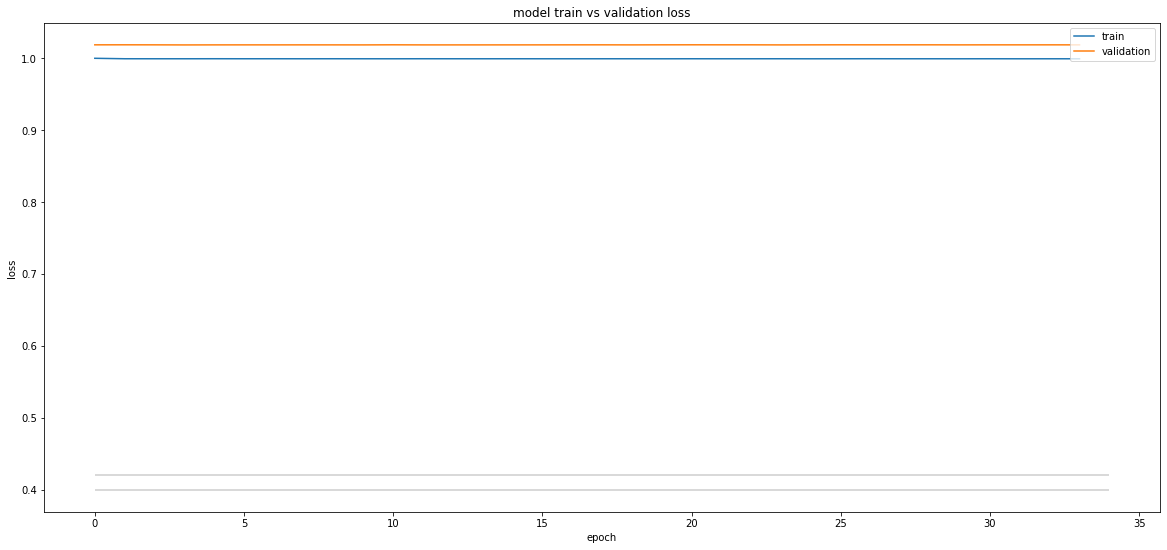

In [8]:
# # Clear any logs from previous runs
# !rm -rf ./logs/Xpresso_ort_0-006/
# maxlen=18850
model_type="Xpresso_ort"
checkpoint_dir="Xpresso_ort"
logdir = None #f"{model_type}_0-006"
net = projCNN1D(checkpoint_dir=checkpoint_dir, model_type=model_type, n_epochs=100, batch_size=128, learning_rate=5e-4, CNN_input=(maxlen, 4), dropout_rate=0.5, logdir=logdir)
net.train_model([X_trainpromoter_p, X_trainhalflife], y_train, [X_validationpromoter_p, X_validationhalflife], y_validation)

In [9]:
net.evaluate([X_testpromoter_p, X_testhalflife], y_test)

Test R^2 = 0.000


0.0

In [10]:
net.evaluate_best([X_testpromoter_p, X_testhalflife], y_test)

Test R^2 = 0.000


0.0

No handles with labels found to put in legend.


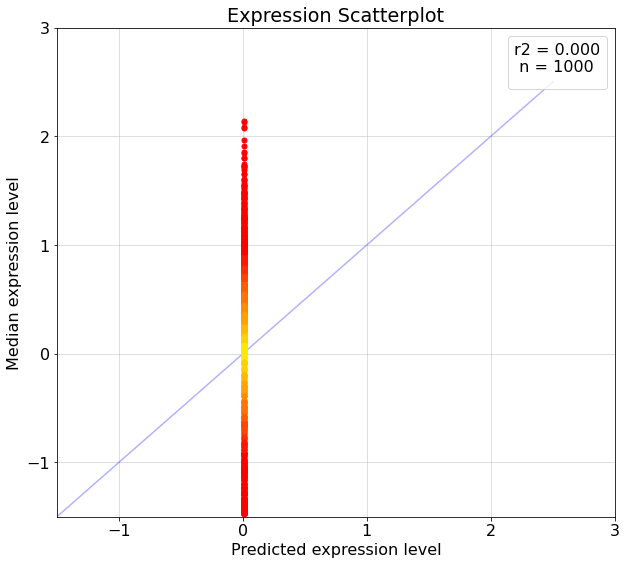

In [11]:
net.plot_r2([X_testpromoter_p, X_testhalflife], y_test)